In [2]:
# Necessary imports and jupyter settings.
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
# use Yahoo API to get and format data from the list of symbols.
def get_data(symbols, start = datetime.datetime(2011, 1, 1), end = datetime.datetime.now()):
    result = None
    for symbol in symbols:
        df = pdr.DataReader(symbol['symbol'], 'yahoo', start, end)
        df = df.rename(columns={df.columns[0]: symbol['title']})
        if result is None:
            result = df.copy()
        else:
            result = pd.merge_asof(left=result.copy(), right=df, on='Date')
           
    result = result.set_index('Date')
    return result
symbols = [
    {'symbol': 'EPOL', 'title': 'WIG 20'},
    {'symbol': '^GSPC', 'title': 'S&P 500'},
] 

In [32]:
# Data manipulation.
data = get_data(symbols)
data = data[['Adj Close_x','Adj Close_y']]
data = data.rename(columns={data.columns[0]: 'MSCI PL'})
data = data.rename(columns={data.columns[1]: 'S&P 500 US'})
# Additional columns for assets returns and rolling sharpe ratios.
data['pct_change_pl'] = data['MSCI PL'].pct_change() * 100
data['pct_change_us'] = data['S&P 500 US'].pct_change() * 100
data['rolling_sharpe_pl'] = data.pct_change_pl.rolling(200).apply(lambda x: (x.mean() - 0.02) / x.std(), raw = True)
data['rolling_sharpe_us'] = data.pct_change_us.rolling(200).apply(lambda x: (x.mean() - 0.02) / x.std(), raw = True)
data = data.dropna(0)

In [33]:
data

,MSCI PL,S&P 500 US,pct_change_pl,pct_change_us,rolling_sharpe_pl,rolling_sharpe_us
Date,,,,,,
2011-10-18,20.540026,1225.380005,2.776708,2.041872,-0.039593,-0.020024
2011-10-19,20.054459,1209.880005,-2.364004,-1.264914,-0.044663,-0.023967
2011-10-20,19.676804,1215.390015,-1.883147,0.455418,-0.045204,-0.024127
2011-10-21,20.470655,1238.250000,4.034455,1.880877,-0.035216,-0.016703
2011-10-24,21.187439,1254.189941,3.501517,1.287296,-0.023569,-0.011533
...,...,...,...,...,...,...
2020-08-31,18.139999,3500.310059,-1.786681,-0.219496,-0.025205,0.029698
2020-09-01,17.879999,3526.649902,-1.433298,0.752500,-0.028435,0.031134
2020-09-02,17.809999,3580.840088,-0.391497,1.536591,-0.031076,0.032763


<Figure size 1440x432 with 0 Axes>

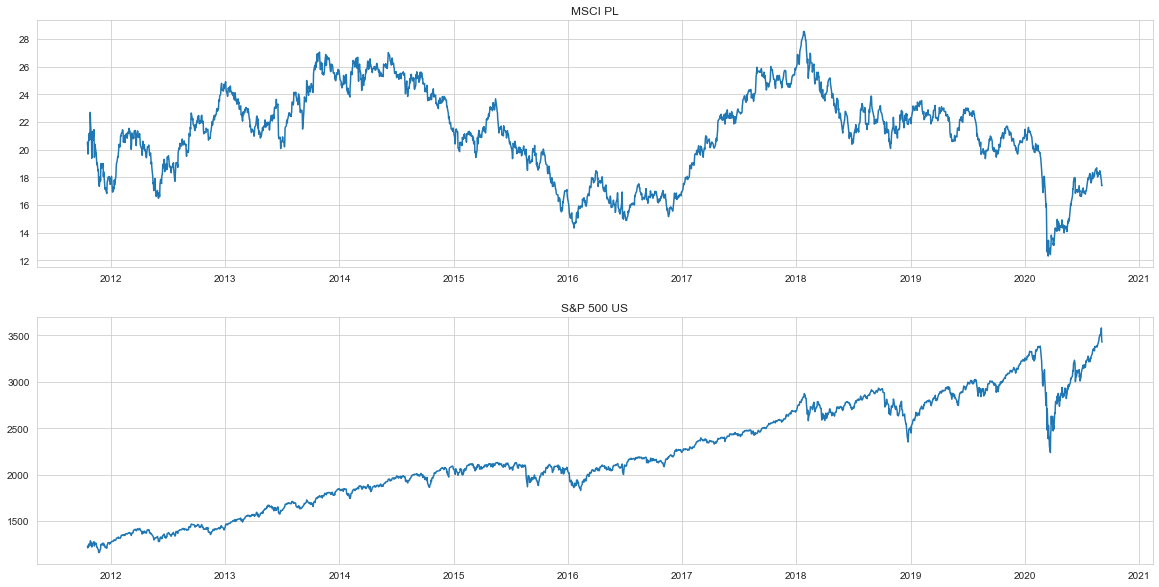

In [34]:
# Actual plotting and visualising
fig = plt.figure()
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(20,10)) 
axes[0].plot(data[['MSCI PL']])
axes[1].plot(data[['S&P 500 US']])
axes[0].set_title('MSCI PL')
axes[1].set_title('S&P 500 US')

Text(0.5, 1.0, 'S&P 500 US vs 200 MA')

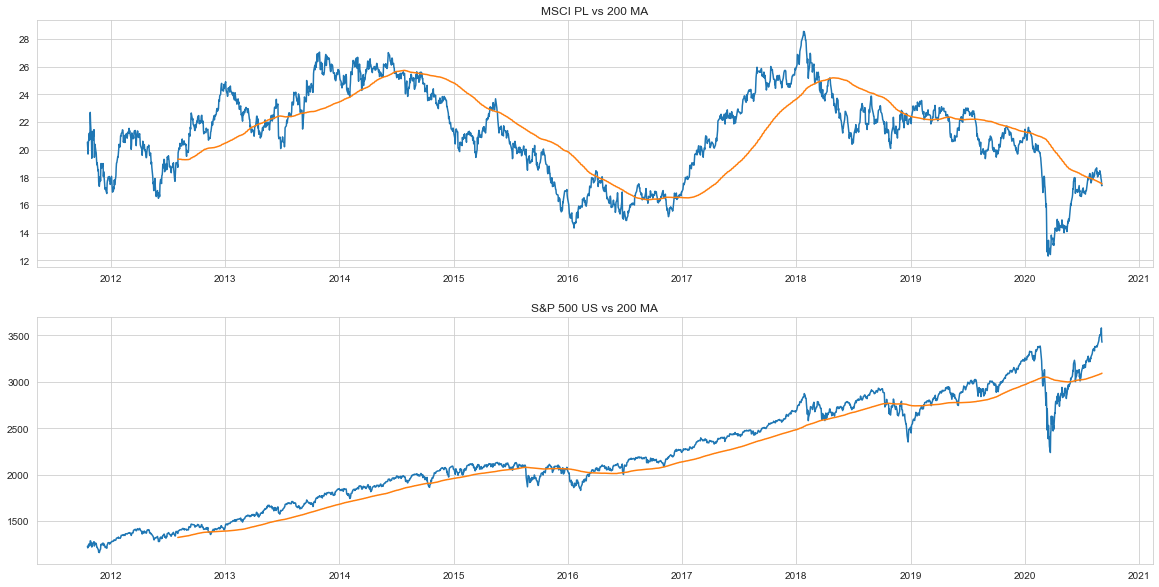

In [6]:
data['200_ma_pl'] = data['MSCI PL'].rolling(window=200).mean()
data['200_ma_us'] = data['S&P 500 US'].rolling(window=200).mean()
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(20,10)) 
axes[0].plot(data[['MSCI PL','200_ma_pl']])
axes[0].set_title('MSCI PL vs 200 MA')
axes[1].plot(data[['S&P 500 US','200_ma_us']])
axes[1].set_title('S&P 500 US vs 200 MA')


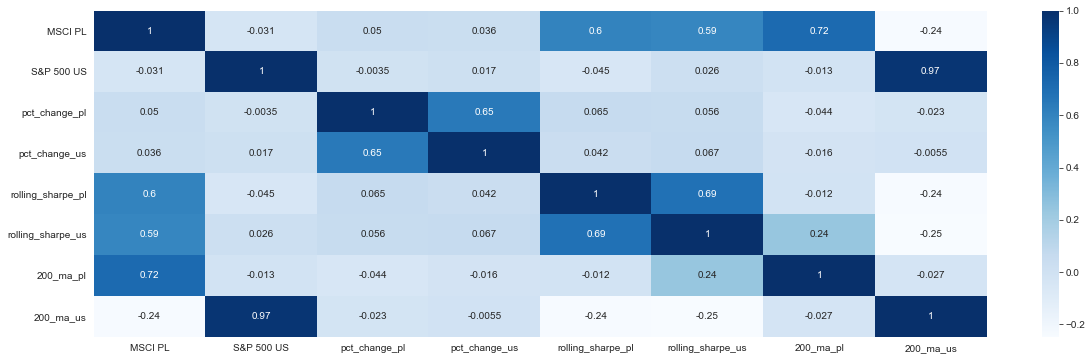

In [12]:
sns.heatmap(data.corr(),cmap='Blues',annot=True)
plt.rcParams['figure.figsize'] = (20,6)

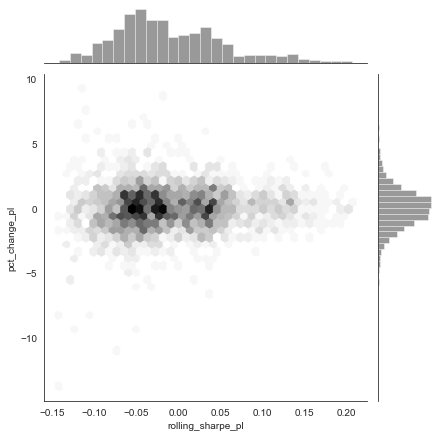

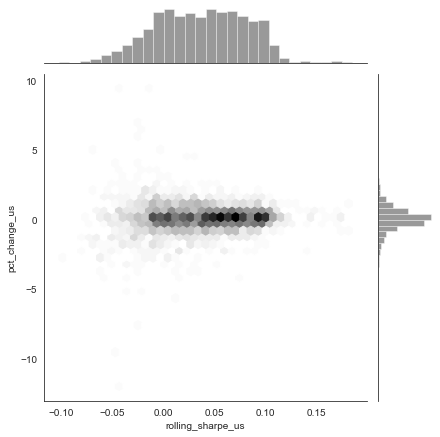

In [31]:
a = data[['rolling_sharpe_pl']]
b = data[['pct_change_pl']]
c = data[['rolling_sharpe_us']]
d = data[['pct_change_us']]
with sns.axes_style("white"):
    sns.jointplot(x=a, y=b, kind="hex", color="k").set_axis_labels("rolling_sharpe_pl", "pct_change_pl")
    sns.jointplot(x=c, y=d, kind="hex", color="k").set_axis_labels("rolling_sharpe_us", "pct_change_us")